In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, make_classification, make_blobs
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import make_pipeline

In [ ]:
def plot_confusion_heatmap(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

In [ ]:
print("\nLoading Breast Cancer and Wine Datasets")
bc_data = load_breast_cancer()
wine_data = load_wine()
X_bc, y_bc = bc_data.data, bc_data.target
X_wine, y_wine = wine_data.data, wine_data.target
X_train, X_test, y_train, y_test = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42)


Loading Breast Cancer and Wine Datasets


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Decision Tree


1. Decision Tree
Accuracy: 0.9415204678362573


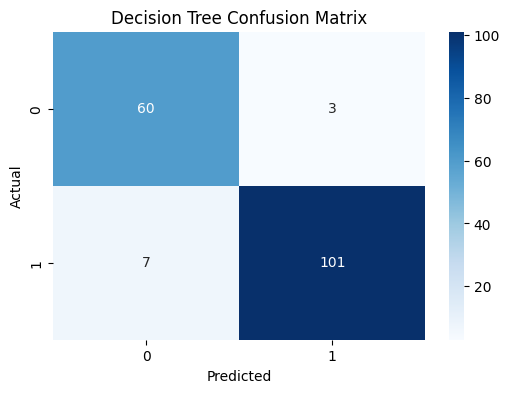

In [ ]:
print("\n1. Decision Tree")
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
plot_confusion_heatmap(y_test, y_pred, "Decision Tree Confusion Matrix")

# 2. Logistic Regression


2. Logistic Regression
Accuracy: 0.9824561403508771


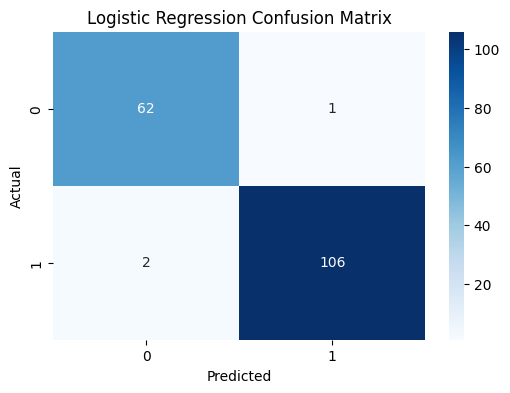

In [ ]:
print("\n2. Logistic Regression")
lr = LogisticRegression(max_iter=3000)
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
plot_confusion_heatmap(y_test, y_pred, "Logistic Regression Confusion Matrix")

# 3. Multilayer Perceptron


3. Multilayer Perceptron
Accuracy: 0.9824561403508771


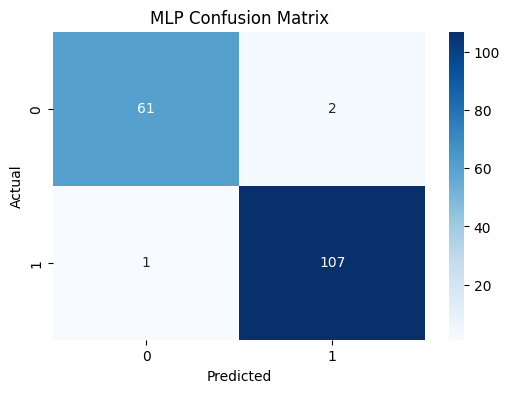

In [ ]:
print("\n3. Multilayer Perceptron")
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000)
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
plot_confusion_heatmap(y_test, y_pred, "MLP Confusion Matrix")

# 4. Support Vector Machine


4. Support Vector Machine
Accuracy: 0.9766081871345029


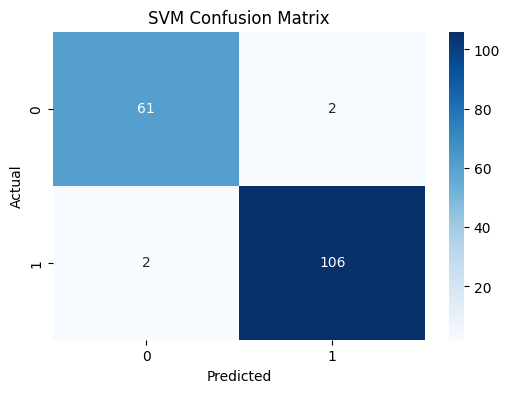

In [ ]:
print("\n4. Support Vector Machine")
svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
plot_confusion_heatmap(y_test, y_pred, "SVM Confusion Matrix")

# 5. AdaBoost


5. AdaBoost
Accuracy: 0.9707602339181286


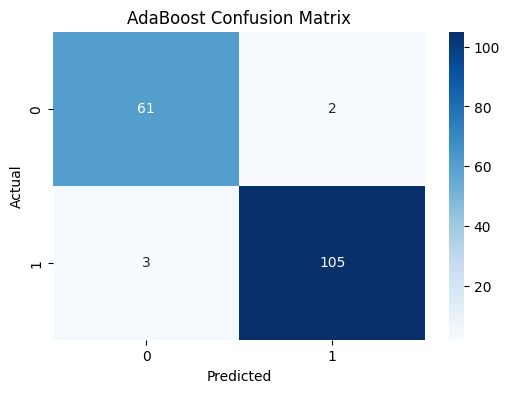

In [ ]:
print("\n5. AdaBoost")
ada = AdaBoostClassifier(n_estimators=50)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
plot_confusion_heatmap(y_test, y_pred, "AdaBoost Confusion Matrix")

# 6. Random Forest (Bagging)


6. Random Forest (Bagging)
Accuracy: 0.9707602339181286


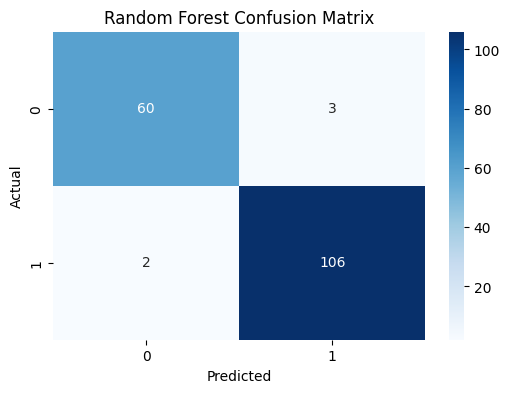

In [ ]:
print("\n6. Random Forest (Bagging)")
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
plot_confusion_heatmap(y_test, y_pred, "Random Forest Confusion Matrix")


# 7. K-means Clustering


7. K-means Clustering


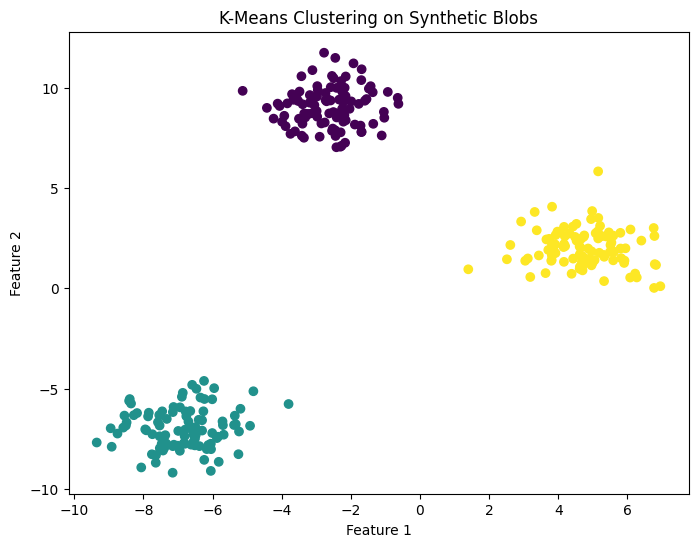

In [ ]:
print("\n7. K-means Clustering")
X_blobs, y_blobs = make_blobs(n_samples=300, centers=3, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_blobs)
plt.figure(figsize=(8, 6))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("K-Means Clustering on Synthetic Blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# 8. PCA


8. Principal Component Analysis


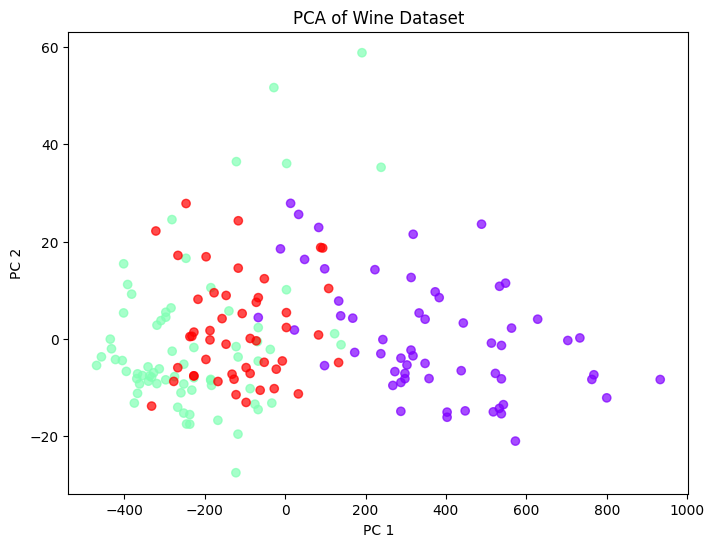

Explained variance ratio: [0.99809123 0.00173592]


In [ ]:
print("\n8. Principal Component Analysis")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_wine)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_wine, cmap='rainbow', alpha=0.7)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA of Wine Dataset')
plt.show()
print("Explained variance ratio:", pca.explained_variance_ratio_)

# 9. Balanced vs Unbalanced Evaluation


9. Balanced vs Unbalanced Dataset Evaluation

Balanced Dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



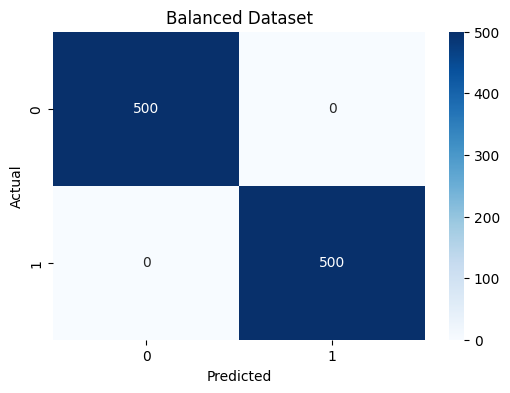


Unbalanced Dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       897
           1       1.00      1.00      1.00       103

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



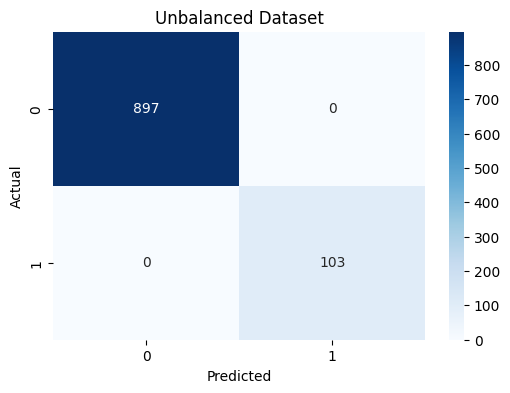

In [ ]:
print("\n9. Balanced vs Unbalanced Dataset Evaluation")
X_bal, y_bal = make_classification(n_samples=1000, weights=[0.5, 0.5], random_state=42)
X_unbal, y_unbal = make_classification(n_samples=1000, weights=[0.9, 0.1], random_state=42)
model = RandomForestClassifier()

print("\nBalanced Dataset:")
model.fit(X_bal, y_bal)
y_pred_bal = model.predict(X_bal)
print(classification_report(y_bal, y_pred_bal))
plot_confusion_heatmap(y_bal, y_pred_bal, "Balanced Dataset")

print("\nUnbalanced Dataset:")
model.fit(X_unbal, y_unbal)
y_pred_unbal = model.predict(X_unbal)
print(classification_report(y_unbal, y_pred_unbal))
plot_confusion_heatmap(y_unbal, y_pred_unbal, "Unbalanced Dataset")


# 10. Comparison of Algorithms

In [ ]:
print("\n10. Comparison of ML Algorithms")
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(max_iter=3000)),
    "MLP": make_pipeline(StandardScaler(), MLPClassifier(max_iter=1000)),
    "SVM": make_pipeline(StandardScaler(), SVC()),
    "AdaBoost": AdaBoostClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    scores = cross_val_score(model, X_bc, y_bc, cv=5)
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}")


10. Comparison of ML Algorithms
Decision Tree: Mean Accuracy = 0.9191
Logistic Regression: Mean Accuracy = 0.9807
MLP: Mean Accuracy = 0.9754
SVM: Mean Accuracy = 0.9736
AdaBoost: Mean Accuracy = 0.9666
Random Forest: Mean Accuracy = 0.9561
